In [347]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [348]:
data=pd.read_csv('breast_cancer.csv')

In [349]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [350]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [351]:
data['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [352]:
data['Class']=data['Class'].replace(2,0)
data['Class']=data['Class'].replace(4,1)

In [353]:
data['Class'].value_counts()

Class
0    444
1    239
Name: count, dtype: int64

In [354]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [355]:
# data=(data-data.mean())/data.std()
label=data['Class']
data=data.drop('Class',axis=1)

data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [356]:
label=label.values
data=data.values

print(label.shape,data.shape)

(683,) (683, 9)


In [357]:
split=0.8

train_x=data[:int(split*data.shape[0])] 
train_y=label[:int(split*data.shape[0])]

test_x=data[int(split*data.shape[0]):]
test_y=label[int(split*data.shape[0]):]

ones=np.ones((train_x.shape[0],1))
train_x=np.hstack((ones,train_x))

ones=np.ones((test_x.shape[0],1))
test_x=np.hstack((ones,test_x))

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(546, 10) (546,) (137, 10) (137,)


In [358]:
def sigmoid(x):
    return 1+1/(1+np.exp(-x))

In [359]:
def hypothesis(x,w):
    return sigmoid(np.dot(x,w))

In [360]:
def loss_function(x,y,w):
    hyp_th=hypothesis(x,w)
    loss = -1.0*np.mean((y*np.log(hyp_th) + (1-y)*np.log(1-hyp_th)))
    return loss

In [361]:
def gradient(x,y,w):
    hyp_th=hypothesis(x,w)
    grad=np.dot(x.T,(y-hyp_th))
    return grad/x.shape[0]

In [362]:
def gradient_descent(x,y):
    lr=0.03
    epochs=2000
    loss=[]
    w=np.zeros((x.shape[1],))
    for i in range(epochs):
        grad=gradient(x,y,w)
        loss.append(loss_function(x,y,w))
        print("Epoch %d: Loss %f"%(i, loss[i]))
        w=w+lr*grad
    return w,loss

In [363]:
w,loss=gradient_descent(train_x,train_y)

Epoch 0: Loss nan
Epoch 1: Loss nan
Epoch 2: Loss nan
Epoch 3: Loss nan
Epoch 4: Loss nan
Epoch 5: Loss nan
Epoch 6: Loss nan
Epoch 7: Loss nan
Epoch 8: Loss nan
Epoch 9: Loss nan
Epoch 10: Loss nan
Epoch 11: Loss nan
Epoch 12: Loss nan
Epoch 13: Loss nan
Epoch 14: Loss nan
Epoch 15: Loss nan
Epoch 16: Loss nan
Epoch 17: Loss nan
Epoch 18: Loss nan
Epoch 19: Loss nan
Epoch 20: Loss nan
Epoch 21: Loss nan
Epoch 22: Loss nan
Epoch 23: Loss nan
Epoch 24: Loss nan
Epoch 25: Loss nan
Epoch 26: Loss nan
Epoch 27: Loss nan
Epoch 28: Loss nan
Epoch 29: Loss nan
Epoch 30: Loss nan
Epoch 31: Loss nan
Epoch 32: Loss nan
Epoch 33: Loss nan
Epoch 34: Loss nan
Epoch 35: Loss nan
Epoch 36: Loss nan
Epoch 37: Loss nan
Epoch 38: Loss nan
Epoch 39: Loss nan
Epoch 40: Loss nan
Epoch 41: Loss nan
Epoch 42: Loss nan
Epoch 43: Loss nan
Epoch 44: Loss nan
Epoch 45: Loss nan
Epoch 46: Loss nan
Epoch 47: Loss nan
Epoch 48: Loss nan
Epoch 49: Loss nan
Epoch 50: Loss nan
Epoch 51: Loss nan
Epoch 52: Loss nan
Epo

C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_2852\2592290787.py:3: RuntimeWarning: invalid value encountered in log
  loss = -1.0*np.mean((y*np.log(hyp_th) + (1-y)*np.log(1-hyp_th)))
C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_2852\2592290787.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -1.0*np.mean((y*np.log(hyp_th) + (1-y)*np.log(1-hyp_th)))
C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_2852\2592290787.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -1.0*np.mean((y*np.log(hyp_th) + (1-y)*np.log(1-hyp_th)))
C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_2852\1721806001.py:2: RuntimeWarning: overflow encountered in exp
  return 1+1/(1+np.exp(-x))


Epoch 972: Loss nan
Epoch 973: Loss nan
Epoch 974: Loss nan
Epoch 975: Loss nan
Epoch 976: Loss nan
Epoch 977: Loss nan
Epoch 978: Loss nan
Epoch 979: Loss nan
Epoch 980: Loss nan
Epoch 981: Loss nan
Epoch 982: Loss nan
Epoch 983: Loss nan
Epoch 984: Loss nan
Epoch 985: Loss nan
Epoch 986: Loss nan
Epoch 987: Loss nan
Epoch 988: Loss nan
Epoch 989: Loss nan
Epoch 990: Loss nan
Epoch 991: Loss nan
Epoch 992: Loss nan
Epoch 993: Loss nan
Epoch 994: Loss nan
Epoch 995: Loss nan
Epoch 996: Loss nan
Epoch 997: Loss nan
Epoch 998: Loss nan
Epoch 999: Loss nan
Epoch 1000: Loss nan
Epoch 1001: Loss nan
Epoch 1002: Loss nan
Epoch 1003: Loss nan
Epoch 1004: Loss nan
Epoch 1005: Loss nan
Epoch 1006: Loss nan
Epoch 1007: Loss nan
Epoch 1008: Loss nan
Epoch 1009: Loss nan
Epoch 1010: Loss nan
Epoch 1011: Loss nan
Epoch 1012: Loss nan
Epoch 1013: Loss nan
Epoch 1014: Loss nan
Epoch 1015: Loss nan
Epoch 1016: Loss nan
Epoch 1017: Loss nan
Epoch 1018: Loss nan
Epoch 1019: Loss nan
Epoch 1020: Loss nan

In [364]:
print(w)

[ -37.60857424 -110.31531072  -50.8311427   -53.47031171  -51.48579662
  -79.63246572  -52.92864378  -82.16301795  -49.17906755  -39.81702056]


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

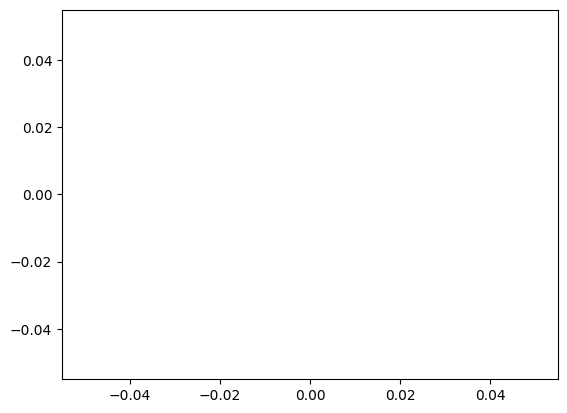

In [365]:
print(loss)
plt.plot(loss)

In [366]:
def accuracy(data, label):
    correct = 0
    for i in range(data.shape[0]):
        pred = hypothesis(data[i], w)
        if pred >= 0.5:
            pred = 1
        else:
            pred = 0

        if pred == label[i]:
            correct += 1
    return correct/data.shape[0]

print(accuracy(test_x, test_y))

0.25547445255474455


C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_2852\1721806001.py:2: RuntimeWarning: overflow encountered in exp
  return 1+1/(1+np.exp(-x))
